In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

In [3]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if(len(eyes) >= 2):
            return roi_color

In [4]:
path_to_data = './dataset/'
path_to_cr_data = './dataset/cropped/'

In [5]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [10]:
img_dirs

['./dataset/serena_williams',
 './dataset/virat_kohli',
 './dataset/.ipynb_checkpoints',
 './dataset/cropped',
 './dataset/maria_sharapova',
 './dataset/lionel_messi',
 './dataset/roger_federer']

In [6]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [7]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)

    celebrity_file_names_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
        ext = entry.path.split('.')[-1]
        
        if ext!='jpg' and ext!='png':
            continue
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)

            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name

            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1        

            if not cv2.imwrite(cropped_file_path, roi_color):
                print("Could not write image")

serena_williams
virat_kohli


libpng warning: iCCP: known incorrect sRGB profile


.ipynb_checkpoints
cropped
maria_sharapova
lionel_messi
roger_federer


In [8]:
import numpy as np
import pywt
import cv2

def w2d(img, mode = 'haar', level=1):
    imArray = img
    imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    imArray = np.float32(imArray)
    imArray /= 255
    coeffs = pywt.wavedec2(imArray,mode,level=level)

    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0

    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)

    return imArray_H

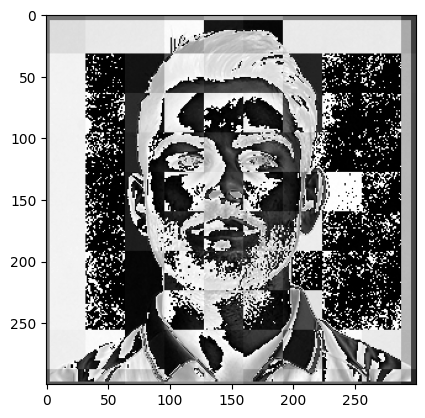

In [9]:
cropped_image = cv2.imread('./test_images/vk2.png')

im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap='gray')

In [14]:
class_dict = {}
count = 0
del celebrity_file_names_dict['cropped']
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'serena_williams': 0,
 'virat_kohli': 1,
 'maria_sharapova': 2,
 'lionel_messi': 3,
 'roger_federer': 4}

In [18]:
X,y = [],[]
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img,(32,32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har,(32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

[ WARN:0@1395.488] global loadsave.cpp:248 findDecoder imread_('./dataset/cropped/serena_williams/serena_williams8.png'): can't open/read file: check file path/integrity
[ WARN:0@1395.488] global loadsave.cpp:248 findDecoder imread_('./dataset/cropped/serena_williams/serena_williams9.png'): can't open/read file: check file path/integrity
[ WARN:0@1395.492] global loadsave.cpp:248 findDecoder imread_('./dataset/cropped/serena_williams/serena_williams12.png'): can't open/read file: check file path/integrity
[ WARN:0@1395.501] global loadsave.cpp:248 findDecoder imread_('./dataset/cropped/serena_williams/serena_williams16.png'): can't open/read file: check file path/integrity
[ WARN:0@1395.501] global loadsave.cpp:248 findDecoder imread_('./dataset/cropped/serena_williams/serena_williams17.png'): can't open/read file: check file path/integrity
[ WARN:0@1395.501] global loadsave.cpp:248 findDecoder imread_('./dataset/cropped/serena_williams/serena_williams18.png'): can't open/read file: ch

In [19]:
X

[array([[238],
        [243],
        [242],
        ...,
        [ 56],
        [ 38],
        [100]], dtype=uint8),
 array([[  4],
        [ 15],
        [ 37],
        ...,
        [164],
        [ 28],
        [198]], dtype=uint8),
 array([[106],
        [111],
        [197],
        ...,
        [229],
        [245],
        [223]], dtype=uint8),
 array([[147],
        [139],
        [126],
        ...,
        [208],
        [ 25],
        [ 65]], dtype=uint8),
 array([[116],
        [120],
        [120],
        ...,
        [ 13],
        [165],
        [248]], dtype=uint8),
 array([[108],
        [107],
        [108],
        ...,
        [  2],
        [ 18],
        [ 60]], dtype=uint8),
 array([[ 65],
        [182],
        [251],
        ...,
        [251],
        [250],
        [239]], dtype=uint8),
 array([[ 46],
        [ 74],
        [131],
        ...,
        [ 19],
        [210],
        [234]], dtype=uint8),
 array([[ 11],
        [ 12],
        [ 16],
        ...

In [20]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

In [21]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(142, 4096)

In [22]:
X[0]

array([238., 243., 242., ...,  56.,  38., 100.])

In [23]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [25]:
pipe = Pipeline([('scaler', StandardScaler()),('svc',SVC(kernel = 'rbf',C=10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6666666666666666

In [26]:
len(X_test)

36

In [27]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       1.00      0.90      0.95        10
           2       0.71      0.50      0.59        10
           3       0.58      0.88      0.70         8
           4       0.20      0.25      0.22         4

    accuracy                           0.67        36
   macro avg       0.63      0.60      0.61        36
weighted avg       0.70      0.67      0.67        36



In [28]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [31]:
model_params = {
    'svm': {
        'model':svm.SVC(gamma='auto',probability=True),
        'params': {
            'svc__C':[1,10,100,1000],
            'svc__kernel':['rbf','linear']
        }
    },
    'random_forest': {
        'model':RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators':[1,5,10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C':[1,5,10]
        }
    }
}

In [32]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(),mp['model'])
    clf = GridSearchCV(pipe,mp['params'],cv=5,return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model':algo,
        'best_score': clf.best_score_,
        'best_params':clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.763203,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.678788,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.801732,{'logisticregression__C': 1}


In [34]:
best_estimators['svm'].score(X_test,y_test)

0.8333333333333334

In [36]:
best_estimators['random_forest'].score(X_test,y_test)

0.5555555555555556

In [35]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8333333333333334

In [37]:
best_clf = best_estimators['svm']

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[3, 0, 1, 0, 0],
       [0, 9, 0, 1, 0],
       [0, 0, 8, 0, 2],
       [0, 0, 0, 7, 1],
       [0, 0, 1, 0, 3]])

Text(95.72222222222221, 0.5, 'Truth')

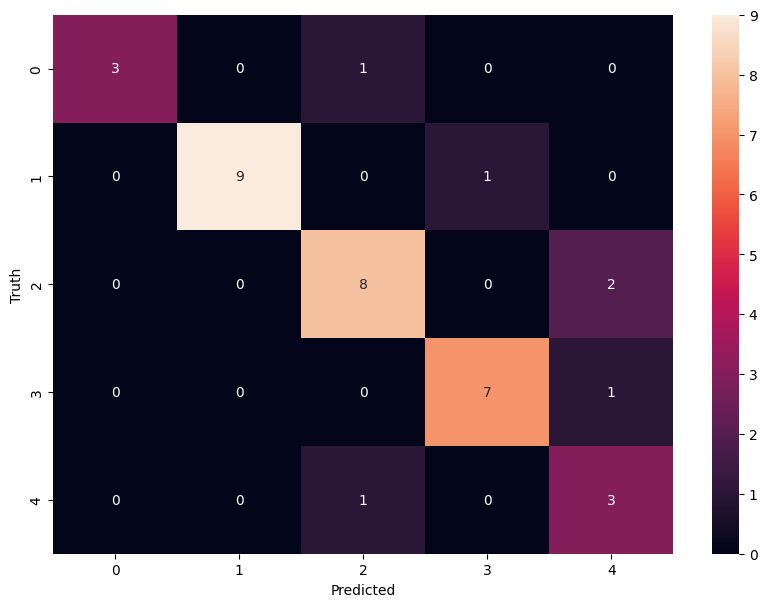

In [40]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [41]:
pip install joblib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [42]:
import joblib
# Save the model as a pickle in a file
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

In [43]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))